#**IMPORT** **LIBRARIES** ✅

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

#**DATA PREPROCESSING** ✅

In [52]:
df = pd.read_csv('/content/diabetes .csv')

In [53]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [54]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [55]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [56]:
num_col = df.select_dtypes(include=['number'])
print(num_col)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [57]:
sum_values = num_col.sum()
min_values = num_col.min()
max_values = num_col.max()

print(sum_values)
print(min_values)
print(max_values)

Pregnancies                  2953.000
Glucose                     92847.000
BloodPressure               53073.000
SkinThickness               15772.000
Insulin                     61286.000
BMI                         24570.300
DiabetesPedigreeFunction      362.401
Age                         25529.000
Outcome                       268.000
dtype: float64
Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64
Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.0

In [58]:
print(df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


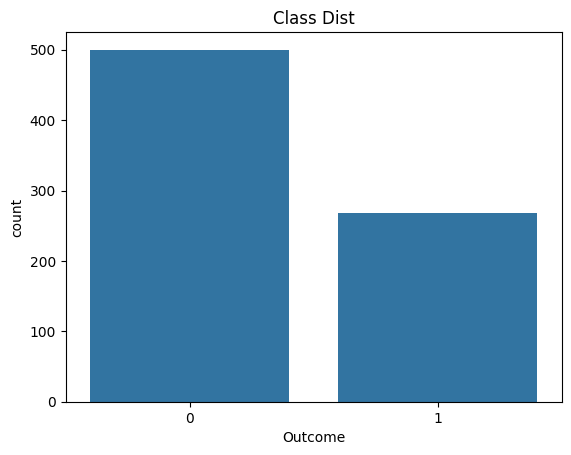

In [59]:
sns.countplot(x='Outcome', data=df)
plt.title("Class Dist")
plt.show()

In [60]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [61]:
for col in zero_columns:
  df[col] = df[col].replace(0, df[col].median())

**EXPLORE OUTLIERS ✅**

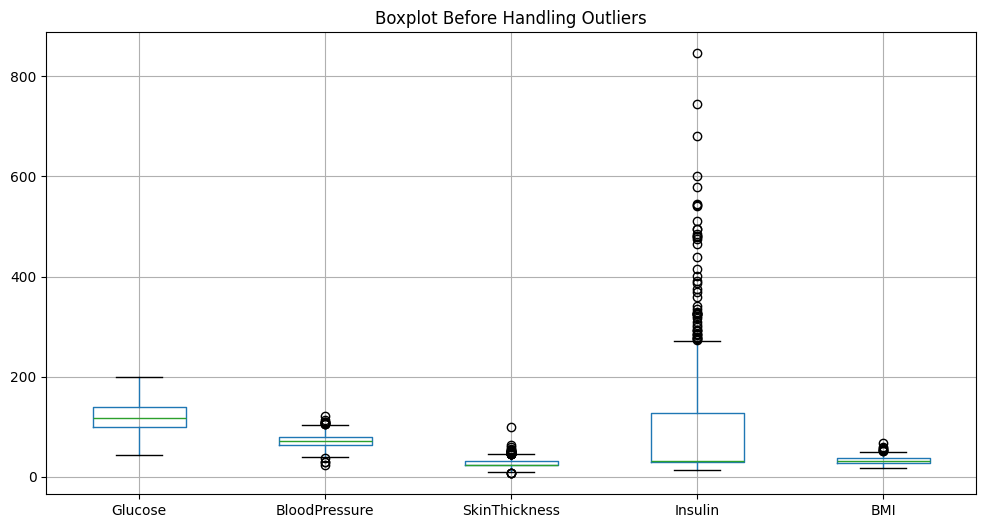

In [62]:

plt.figure(figsize=(12, 6))
df.boxplot(column=zero_columns)
plt.title("Boxplot Before Handling Outliers")
plt.show()

**SHOW DISTRIBUTION**

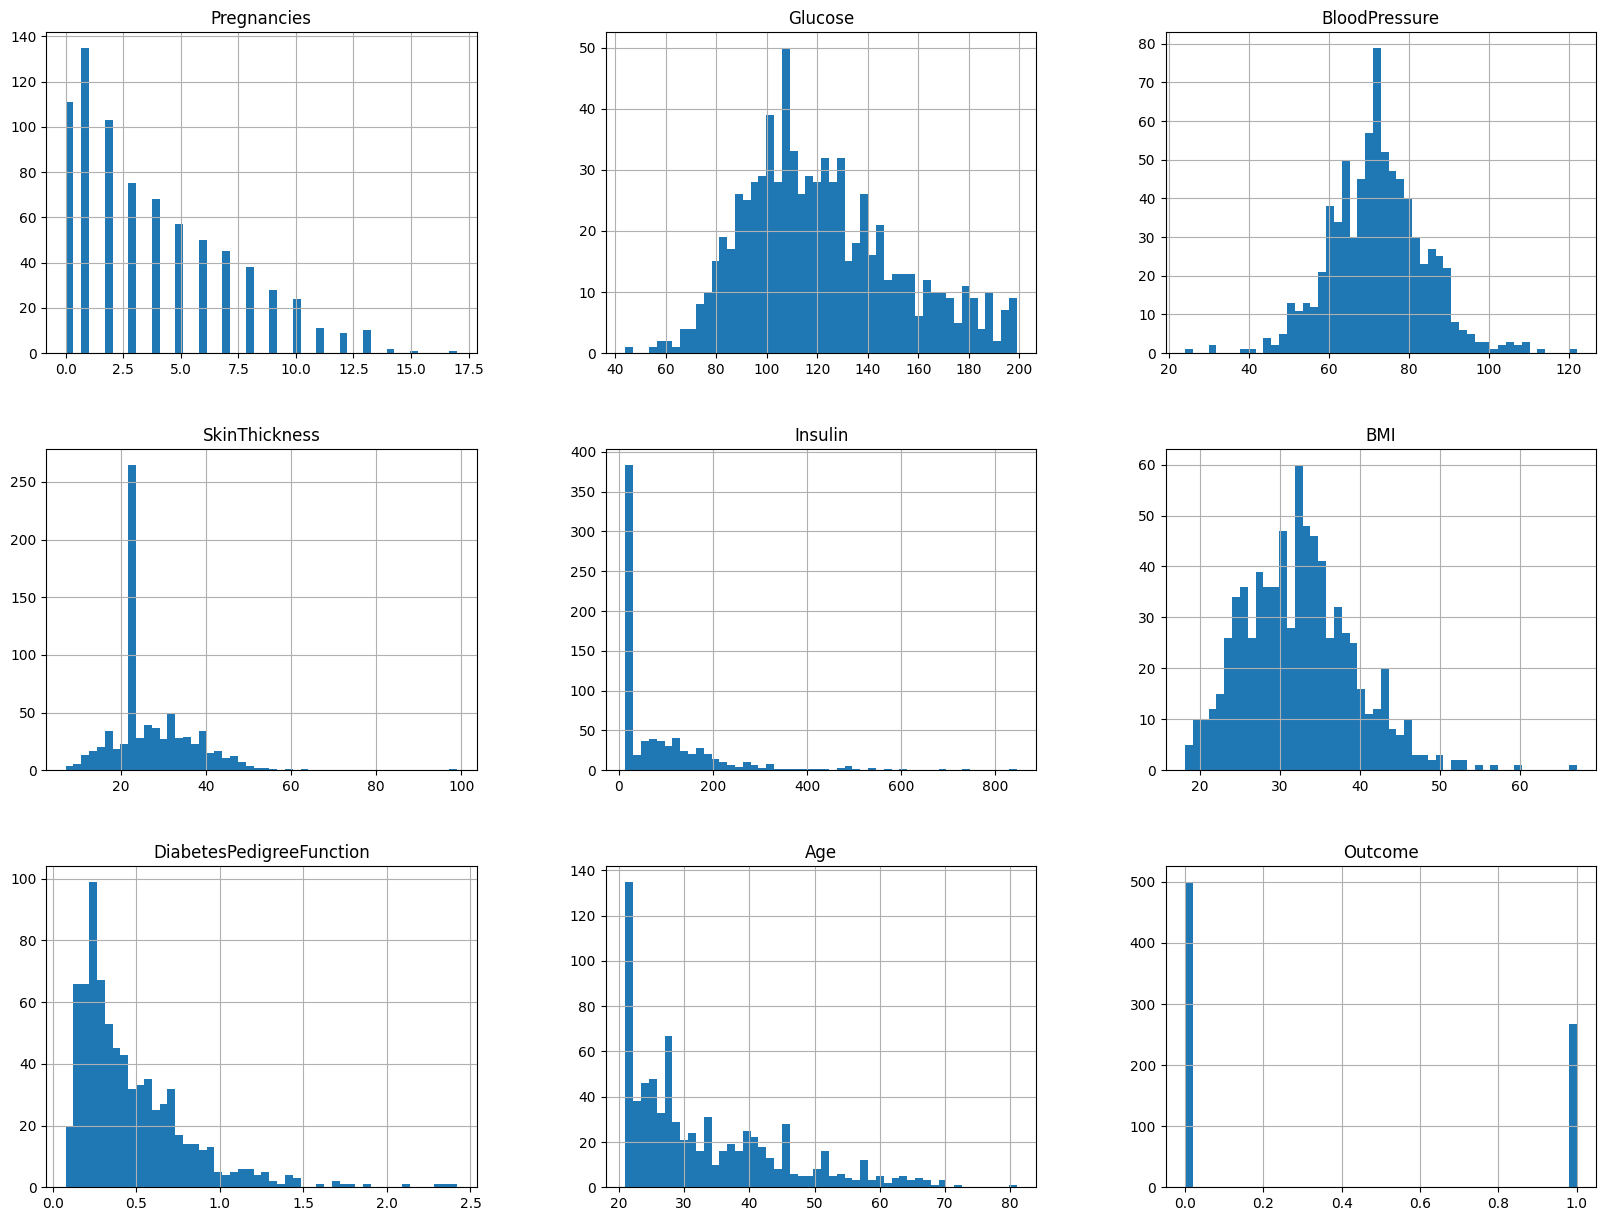

In [63]:
df.hist(bins=50,figsize=(20,15))
plt.show()

**EDA**  🩹

In [64]:
diabets_df3 = df.copy()

zero_col = ['Glucose','Insulin','SkinThickness','BloodPressure','BMI']
diabets_df3[zero_col] = diabets_df3[zero_col].replace(0, np.nan)

In [65]:
for col in ['Glucose','Insulin','SkinThickness']:
    median_col = np.median(diabets_df3[diabets_df3[col].notna()][col])
    diabets_df3[col] = diabets_df3[col].fillna(median_col)
for col in ['BMI','BloodPressure']:
    mean_col = np.mean(diabets_df3[diabets_df3[col].notna()][col])
    diabets_df3[col] = diabets_df3[col].fillna(mean_col)

In [66]:
for col in zero_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


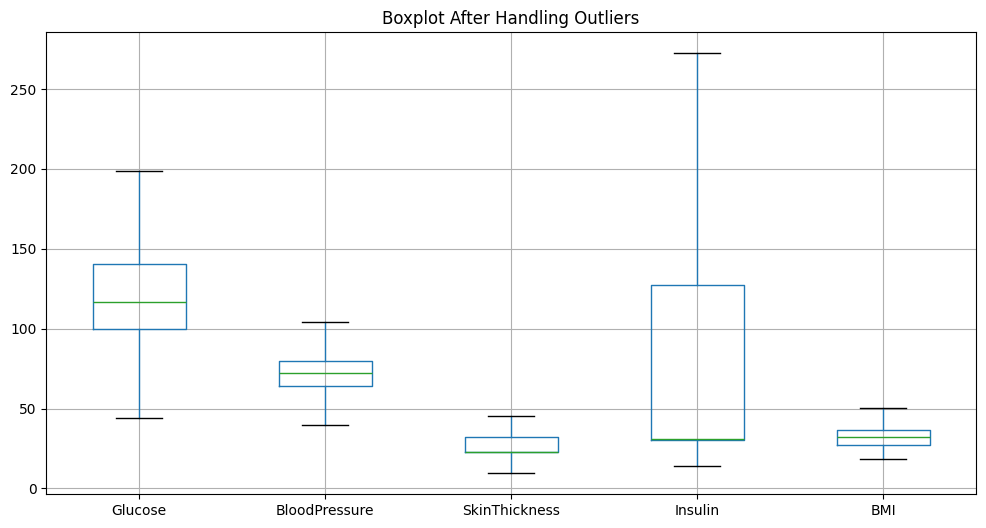

In [67]:
plt.figure(figsize=(12, 6))
df.boxplot(column=zero_columns)
plt.title("Boxplot After Handling Outliers")
plt.show()

In [68]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [69]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())


Outcome
1    500
0    500
Name: count, dtype: int64


Outcome
1    500
0    500
Name: count, dtype: int64


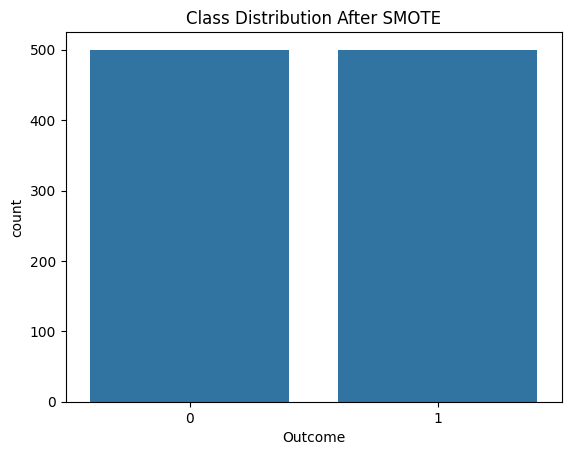

In [71]:
print(pd.Series(y_resampled).value_counts())
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

# Feature Engineering

In [72]:
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_Insulin'] = df['Glucose'] * df['Insulin']

In [73]:
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
    return data + noise

X_augmented = add_noise(X_resampled, noise_level=0.05)
X_resampled = np.vstack((X_resampled, X_augmented))
y_resampled = np.concatenate((y_resampled, y_resampled))

In [74]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age,Glucose_Insulin
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1,1680.0,4514.0
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0,824.6,2592.5
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1,745.6,5581.5
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,590.1,8366.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1422.3,23016.0


**cut::**: ◀

#Hyperparameter Tunning

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [76]:

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [77]:
rf_model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             scoring='accuracy', verbose=2)

In [78]:
best_rf_model = grid_search.best_estimator_
print("Best params:", grid_search.best_params_)

Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [79]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [80]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
y_pred = rf_model.predict(X_test)

In [82]:

rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest model:", rf_accuracy)


Accuracy of Random Forest model: 0.9375


In [83]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost model:", xgb_accuracy)

Accuracy of XGBoost model: 0.9125


In [84]:
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)


In [85]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
gb_accuracy = accuracy_score(y_test, y_pred_gb)

In [86]:
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.89


**BEST MODEL**

In [89]:
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)

Random Forest Accuracy: 0.9375
XGBoost Accuracy: 0.9125
Gradient Boosting Accuracy: 0.89


# Accuracy Distribution Comparison

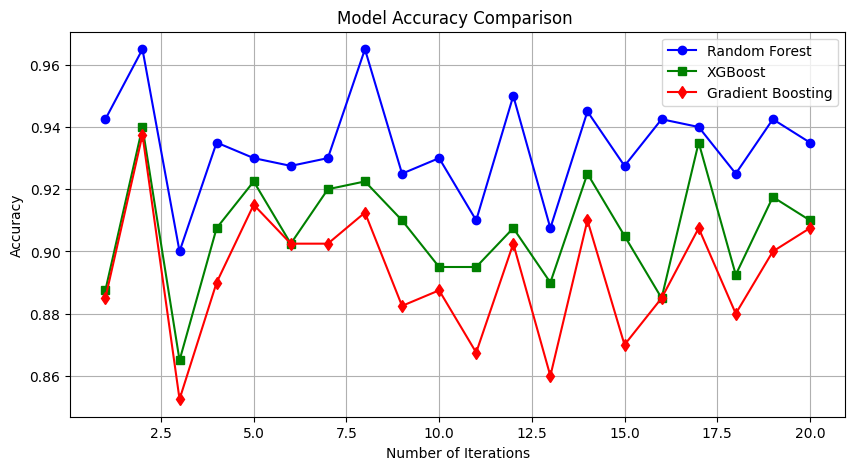

In [94]:

iterations = list(range(1, 21))

rf_accuracies = []
xgb_accuracies = []
gb_accuracies = []

for i in iterations:
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=i)

    # Random Forest :)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, y_pred_rf))

    # XGBoost:)
    xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    xgb_accuracies.append(accuracy_score(y_test, y_pred_xgb))

    # Gradient Boosting :)
    gb_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=5, random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    gb_accuracies.append(accuracy_score(y_test, y_pred_gb))
plt.figure(figsize=(10, 5))
plt.plot(iterations, rf_accuracies, marker='o', linestyle='-', label='Random Forest', color='blue')
plt.plot(iterations, xgb_accuracies, marker='s', linestyle='-', label='XGBoost', color='green')
plt.plot(iterations, gb_accuracies, marker='d', linestyle='-', label='Gradient Boosting', color='red')

plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison ")
plt.legend()
plt.grid(True)
plt.show()


[[ 97 102]
 [ 96 105]]


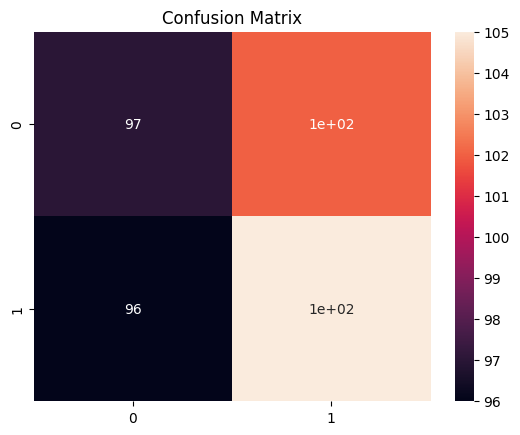

In [95]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.show()